In [ ]:
# YOU MUST COPY AND RUN THE FIRST FOUR CELLS FOR THE DATA TO BE CORRECT!!! DON'T FORGET TO DO THAT.

In [1]:
# relevant imports

# base
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# data prep
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from scipy import stats

# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# !pip install seaborn
import seaborn as sn
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# uncomment !pip install commands if you get an error

In [2]:
# import feature data - make sure csv files are in the same directory
x_train = pd.read_csv("./x_train.csv")
x_val = pd.read_csv("./x_val.csv")

In [3]:
# import state data => no header, so you have to specify header=None
y_train = pd.read_csv("./y_train.csv", header=None)
y_val = pd.read_csv("./y_val.csv", header=None)

In [4]:
# flatten 1-column dataframe into numpy ndarray (it'll give you an error if you don't do this)
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

In [ ]:
# START OF MY RANDOM FOREST MODEL

In [5]:
# load scikit's random forest classifier library, initialize, and fit model with training data
# https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/
# http://dataaspirant.com/2017/06/26/random-forest-classifier-python-scikit-learn/
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
# predictions and probabilities
predictions = clf.predict(x_val)
probabilities = clf.predict_proba(x_val)

In [7]:
# training and validation accuracy
print ("Train Accuracy: ", accuracy_score(y_train, clf.predict(x_train)))
print ("Validation Accuracy: ", accuracy_score(y_val, predictions))

Train Accuracy:  0.970196728725409
Validation Accuracy:  0.6560186929976634


In [14]:
# confusion matrix basic stats
cm = confusion_matrix(y_val, predictions)
print("Confusion matrix ", cm)

Confusion matrix  [[31432  8189]
 [14629 12085]]
<class 'numpy.ndarray'>


In [9]:
# better confusion matrix depiction
pd.crosstab(y_val, predictions, rownames=['Actual Status'], colnames=['Predicted Status'])

Predicted Status,failed,successful
Actual Status,,
failed,31432,8189
successful,14629,12085


Text(0.5,1,'Confusion Matrix for Random Forest Classifier')

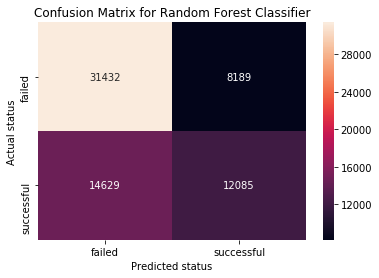

In [30]:
class_names = ["failed","successful"]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
fig = plt.figure()
heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Confusion Matrix for Random Forest Classifier')

In [31]:
# importance of each feature
list(zip(x_train, clf.feature_importances_))

[('usd_goal_real', 0.08218720034821894),
 ('duration_days', 0.0604407249054144),
 ('goal*days', 0.0905257468638318),
 ('name_word_count', 0.050339779691440954),
 ('name_sentiment', 0.024313739076560148),
 ('main_category_Art', 0.0024136285584949466),
 ('main_category_Comics', 0.003860554237666251),
 ('main_category_Crafts', 0.0021242642869697854),
 ('main_category_Dance', 0.002236244411175625),
 ('main_category_Design', 0.0026695439909809),
 ('main_category_Fashion', 0.003901431282689054),
 ('main_category_Film & Video', 0.003496497746553866),
 ('main_category_Food', 0.0028435000310008418),
 ('main_category_Games', 0.0030025282936625894),
 ('main_category_Journalism', 0.00155994785980431),
 ('main_category_Music', 0.00645474864814152),
 ('main_category_Photography', 0.0016173761606309831),
 ('main_category_Publishing', 0.0031325716106848428),
 ('main_category_Technology', 0.004773263277460853),
 ('main_category_Theater', 0.006246508374841043),
 ('country_AT', 0.00030583719402046494),
 

In [32]:
# classification report with relevant statistics
cr = classification_report(y_val, predictions)
print(cr)

             precision    recall  f1-score   support

     failed       0.68      0.79      0.73     39621
 successful       0.60      0.45      0.51     26714

avg / total       0.65      0.66      0.65     66335



In [34]:
# using only these four features
# feats = ['usd_goal_real','duration_days','goal*days','name_sentiment']
# clf.fit(x_train[feats], y_train)
# predictions and probabilities
# predictions = clf.predict(x_val[feats])
# probabilities = clf.predict_proba(x_val[feats])
# training and validation accuracy
# print ("Train Accuracy: ", accuracy_score(y_train, clf.predict(x_train[feats])))
# print ("Validation Accuracy: ", accuracy_score(y_val, predictions))

Train Accuracy:  0.7349714831285646
Validation Accuracy:  0.6069344991331876
